<a href="https://colab.research.google.com/github/JaperTai77/Tensorflow_DL/blob/main/CV_classification_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification

## Classify Single Image

### Import data and libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
zip_object = zipfile.ZipFile(file = '/content/fer_images.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

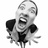

In [8]:
im = cv2.imread('/content/fer2013/train/Angry/1003.jpg')
cv2_imshow(im)

### Split image data

In [9]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range = 5,
                               horizontal_flip = True,
                               zoom_range = 0.3)
test_gen = ImageDataGenerator(rescale = 1./255)

In [25]:
train = train_gen.flow_from_directory('/content/fer2013/train',
                                      target_size = (48,48),
                                      batch_size = 16,
                                      class_mode = 'categorical',
                                      shuffle = True)
test = test_gen.flow_from_directory('/content/fer2013/validation',
                                    target_size = (48,48),
                                    batch_size = 1,
                                    class_mode = 'categorical',
                                    shuffle = False)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [11]:
train.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

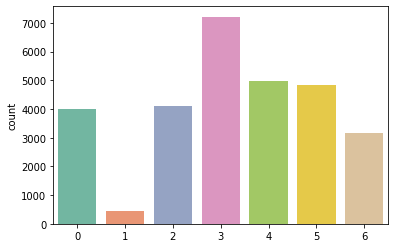

In [12]:
fig, ax = plt.subplots()
ax = sns.countplot(x = train.classes, palette='Set2',ax = ax)
plt.show()

### Build model

In [13]:
im, label = train.next()

In [14]:
im.shape

(16, 48, 48, 3)

In [15]:
label

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [16]:
import tensorflow.keras.layers as layers

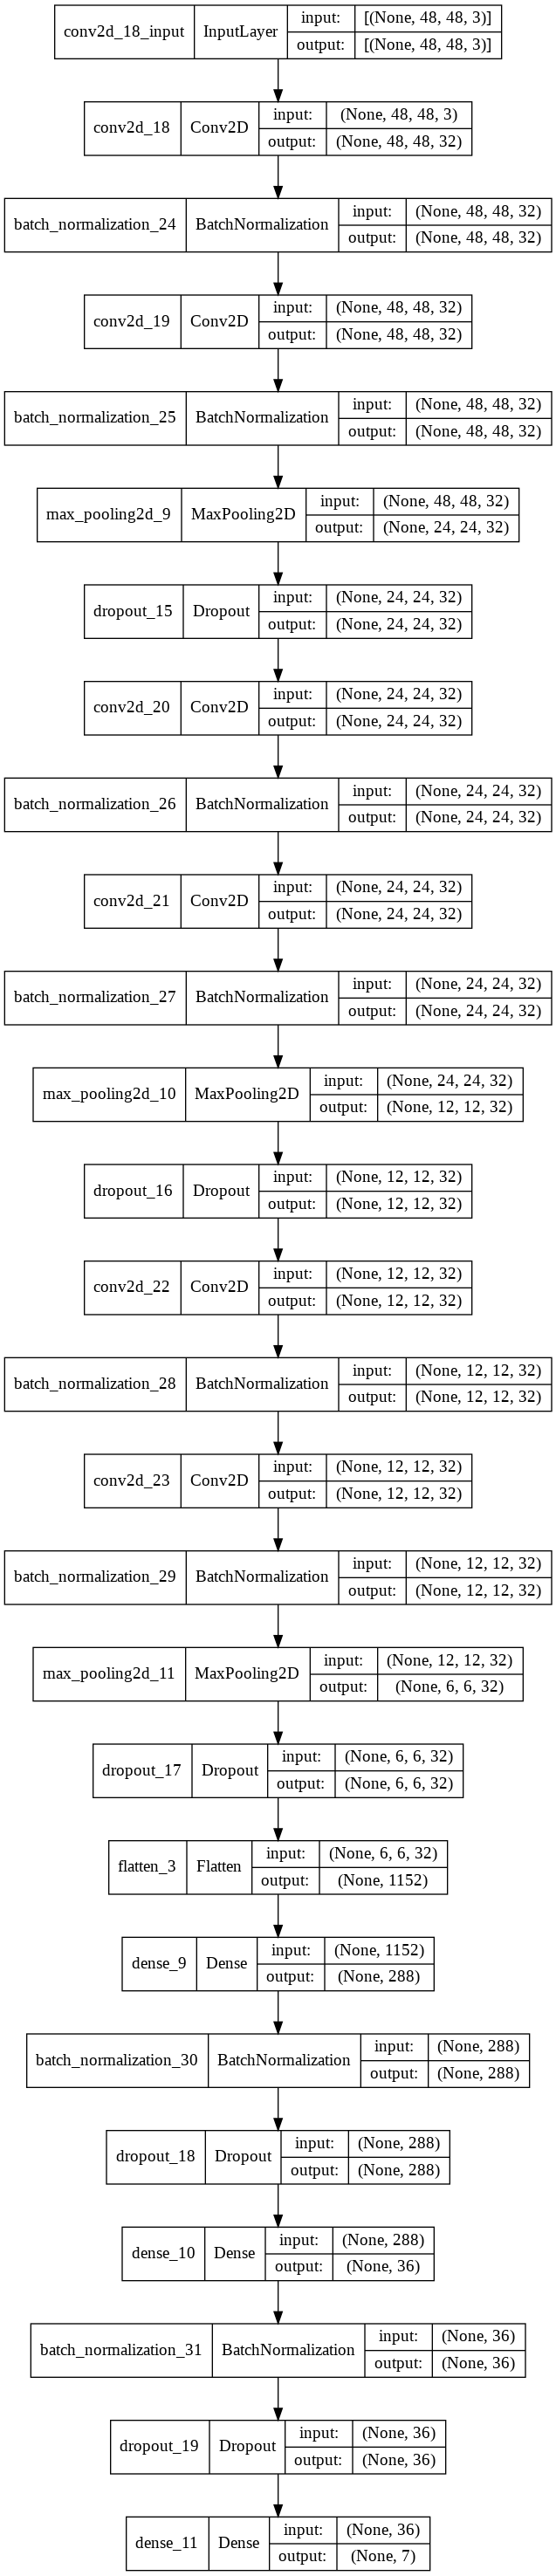

In [23]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (48,48, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3),activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3),activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3),activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(288,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(36,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(7, activation = 'softmax'))

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [27]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs = 30, steps_per_epoch= len(train))

Epoch 1/30
1795/1795 [==============================] - 56s 30ms/step - loss: 1.4609 - accuracy: 0.4344
Epoch 2/30
1795/1795 [==============================] - 59s 33ms/step - loss: 1.3999 - accuracy: 0.4643
Epoch 3/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.3547 - accuracy: 0.4828
Epoch 4/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.3183 - accuracy: 0.4968
Epoch 5/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.2969 - accuracy: 0.5084
Epoch 6/30
1795/1795 [==============================] - 55s 30ms/step - loss: 1.2780 - accuracy: 0.5154
Epoch 7/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.2684 - accuracy: 0.5213
Epoch 8/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.2462 - accuracy: 0.5304
Epoch 9/30
1795/1795 [==============================] - 54s 30ms/step - loss: 1.2427 - accuracy: 0.5324
Epoch 10/30
1795/1795 [==============================] - 54s 30m

In [28]:
model_json = model.to_json()
with open('emotionNN.json','w') as json_file:
  json_file.write(model_json)

In [30]:
from keras.models import save_model
model_saved = save_model(model,'emotionWeight.hdf5')

### Evaluation

In [29]:
model.evaluate(test)

3589/3589 [==============================] - 20s 5ms/step - loss: 1.3400 - accuracy: 0.5400


[1.3400429487228394, 0.5399832725524902]

In [34]:
with open('/content/emotionNN.json','r') as json_file:
  json_saved_model = json_file.read()

model_load = tf.keras.models.model_from_json(json_saved_model)
model_load.load_weights('/content/emotionWeight.hdf5')
model_load.compile(loss = 'categorical_crossentropy', optimizer='Adam',metrics = ['accuracy'])

In [35]:
model_load.evaluate(test)

3589/3589 [==============================] - 25s 7ms/step - loss: 1.3400 - accuracy: 0.5400


[1.3400429487228394, 0.5399832725524902]

In [39]:
pred = model_load.predict(test)
pred = np.argmax(pred,axis = 1)

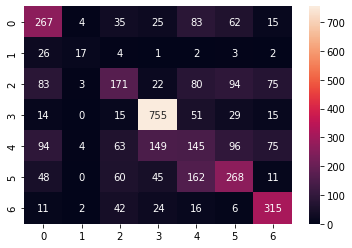

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.classes, pred)
sns.heatmap(cm, annot = True, fmt = 'd')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test.classes, pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52       491
           1       0.57      0.31      0.40        55
           2       0.44      0.32      0.37       528
           3       0.74      0.86      0.79       879
           4       0.27      0.23      0.25       626
           5       0.48      0.45      0.47       594
           6       0.62      0.76      0.68       416

    accuracy                           0.54      3589
   macro avg       0.52      0.50      0.50      3589
weighted avg       0.52      0.54      0.53      3589



In [52]:
test[5][0].shape,test[5][1].shape

((1, 48, 48, 3), (1, 7))

In [68]:
len(test.classes) == len(pred)

True

In [91]:
print(test.class_indices)
class_name = {x: y for y, x in test.class_indices.items()}
print(class_name)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}
{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


In [101]:
def show_prediction():
  plt.figure(figsize = (10,10))
  for i in range(4):
    s = np.random.choice(range(len(test)+1), size = 1)[0]
    im = tf.squeeze(test[s][0]).numpy()

    plt.subplot(2,2,i+1)
    plt.imshow(im)

    if test.classes[s] == pred[s]:
      plt.title(f'Correct Prediction {class_name[test.classes[s]]}',
                color = 'green')
      plt.axis('off')
    else:
      plt.title(f'Real Emotion {class_name[test.classes[s]]},But Predicted {class_name[pred[s]]}',
                color = 'red')
      plt.axis('off')

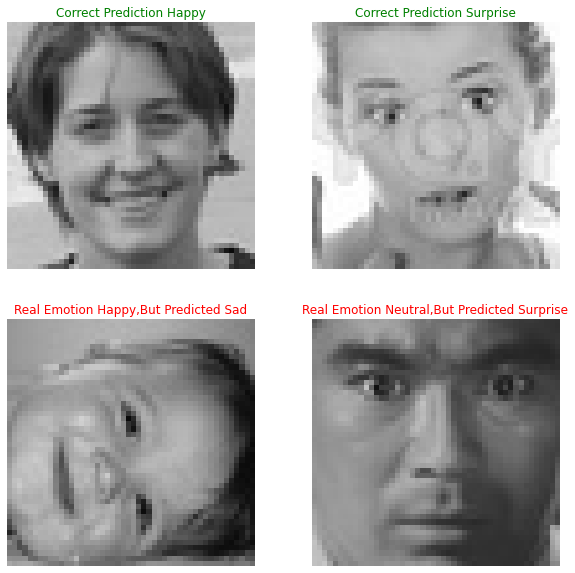

In [102]:
show_prediction()

### Predict user image

(675, 1200, 3)


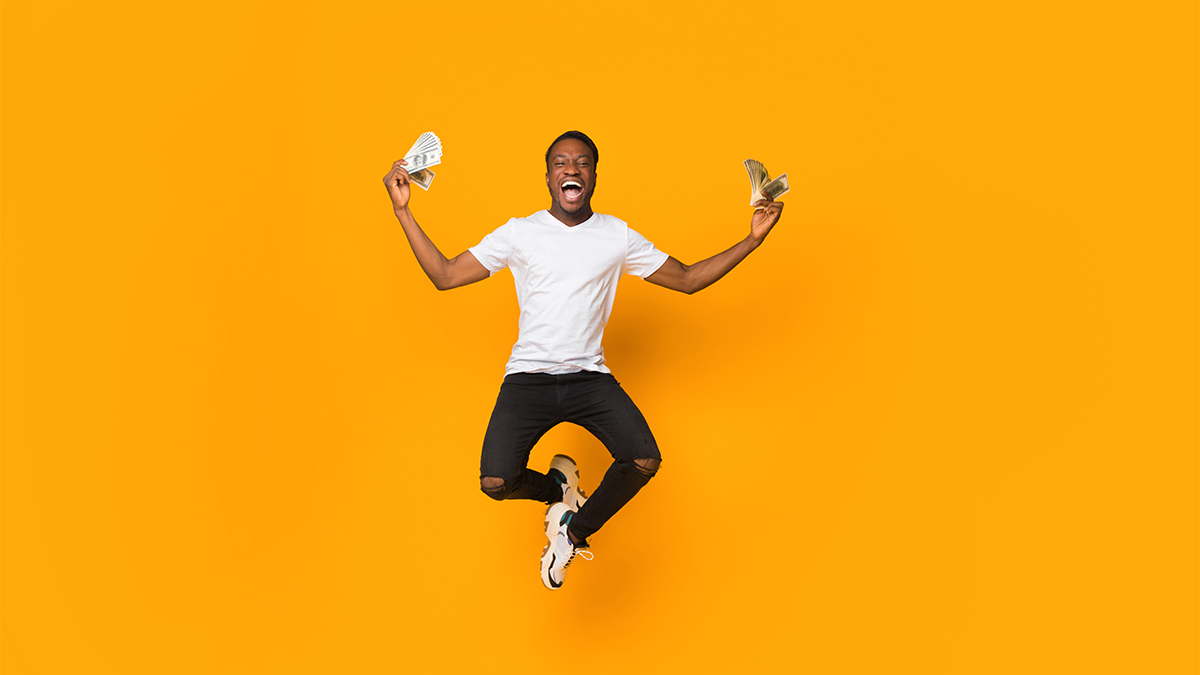

In [125]:
im = cv2.imread('/content/A_Sep20_14_1189155141.jpg')
print(im.shape)
cv2_imshow(im)

In [126]:
face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
im_copy = im.copy()
happy_face = face_detector.detectMultiScale(im_copy)
happy_face

array([[544, 140,  58,  58]], dtype=int32)

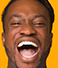

In [133]:
for (x,y,a,b) in happy_face:
  x = x
  y = y
  a = a
  b = b
face = im_copy[y:y+b+10, x:x+a]
cv2_imshow(face)

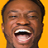

TensorShape([1, 48, 48, 3])

In [134]:
face = cv2.resize(face,(48,48))
cv2_imshow(face)
face = face/255.0
face = tf.expand_dims(face,axis = 0)
face.shape

In [137]:
prob = model_load.predict(face)
pred = np.argmax(prob)
print(class_name[pred])

Angry


In [136]:
prob

array([[0.40958327, 0.00052965, 0.19589278, 0.35128364, 0.00389158,
        0.01669755, 0.02212148]], dtype=float32)

## Detect and Classify Images

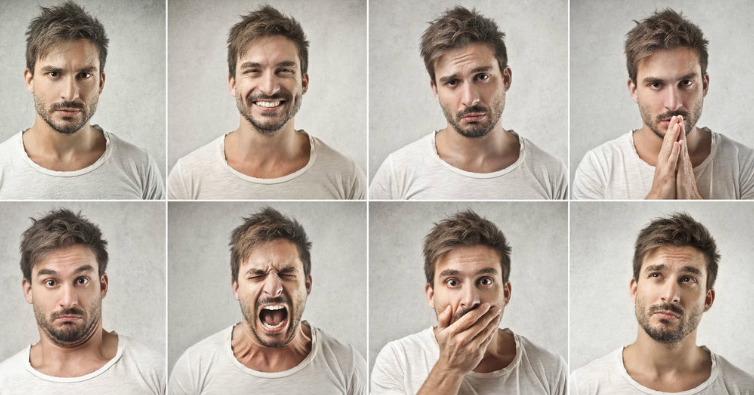

In [5]:
image = cv2.imread('/content/faces_emotions.png')
cv2_imshow(image)

In [6]:
image.shape

(395, 754, 3)

In [7]:
face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_detector.detectMultiScale(image)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [8]:
with open('/content/network_emotions.json','r') as json_file:
  json_saved_model = json_file.read()

model_load = tf.keras.models.model_from_json(json_saved_model)
model_load.load_weights('/content/weights_emotions.hdf5')
model_load.compile(loss = 'categorical_crossentropy', optimizer='Adam',metrics = ['accuracy'])

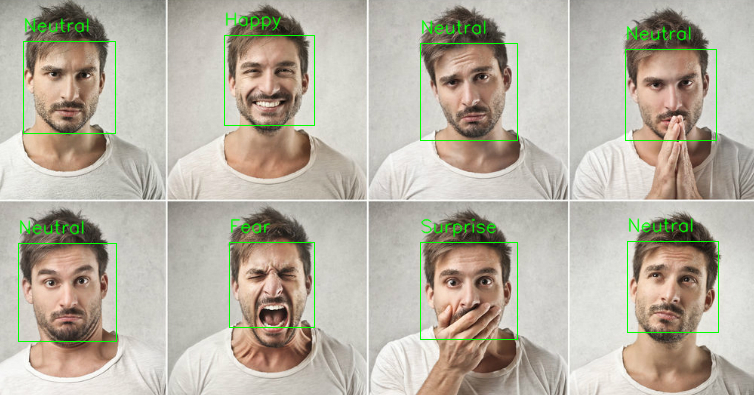

In [6]:
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
  roi = image[y:y+h,x:x+w]
  roi = cv2.resize(roi,(48,48))
  roi = roi/255.0
  roi = np.expand_dims(roi, axis = 0)
  pred = model_load.predict(roi)
  cv2.putText(image,emotions[np.argmax(pred)], (x,y-10), cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0), 1,cv2.LINE_AA)
cv2_imshow(image)

## Classify Video

In [36]:
c = cv2.VideoCapture('/content/emotion_test01.mp4')
con, vid = c.read()
vid.shape

(360, 640, 3)

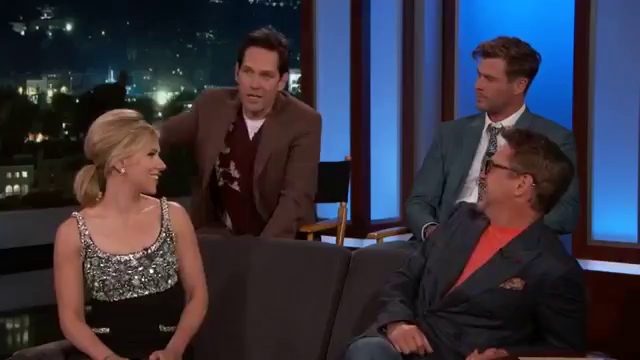

In [13]:
cv2_imshow(vid)

In [31]:
path = '/content/test01_result.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fps = 24
output_vid = cv2.VideoWriter(path, fourcc, fps, (vid.shape[1],vid.shape[0]))

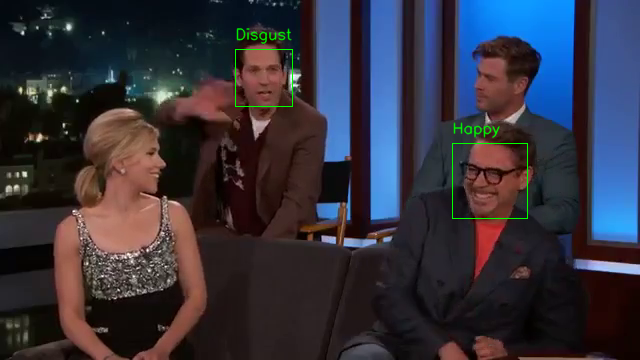

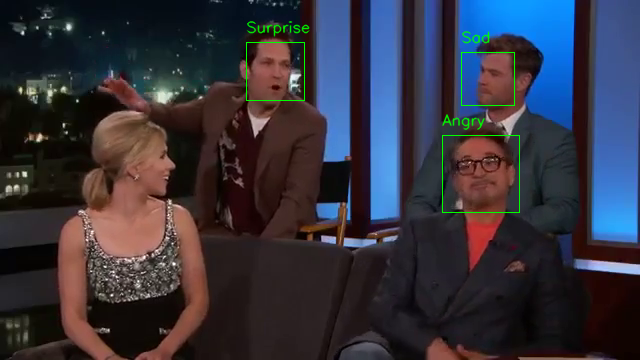

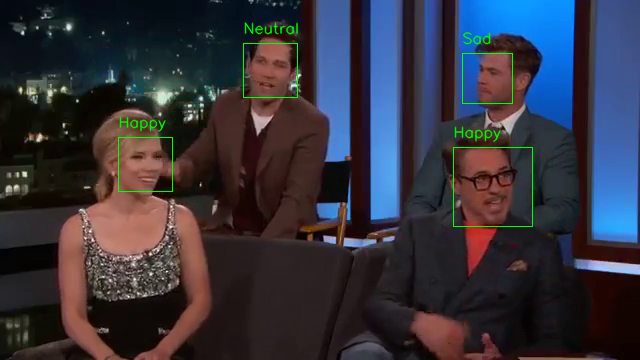

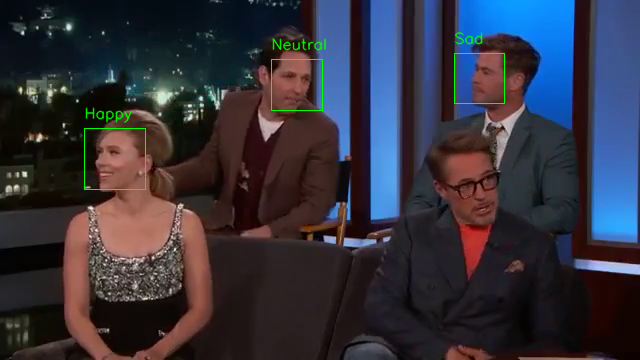

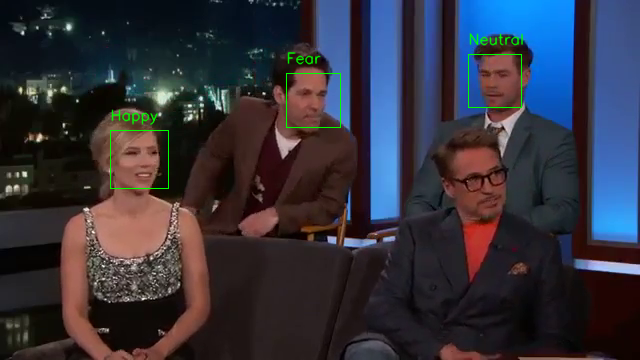

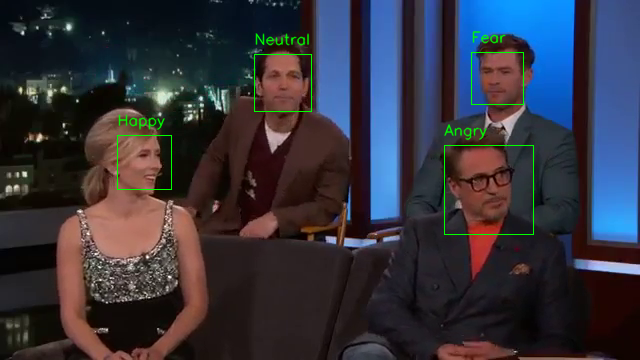

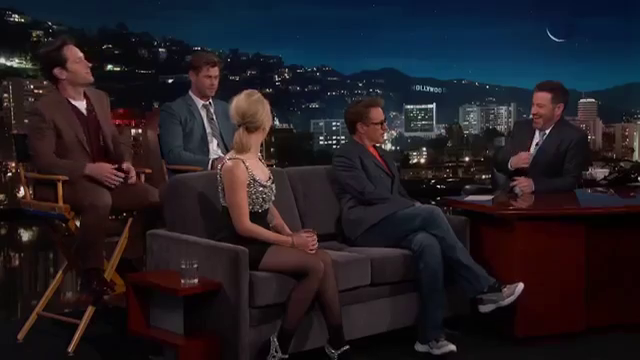

In [32]:
i = 0
while (cv2.waitKey(1)<0):
  con, frame = c.read()

  if not con:
    break
  
  faces = face_detector.detectMultiScale(frame, scaleFactor = 1.2, minNeighbors = 5,minSize = (30,30))
  i = i+1
  if len(faces)>0:
    for (x,y,w,h) in faces:
      frame = cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),1)
      roi = frame[y:y+h,x:x+w]
      roi = cv2.resize(roi,(48,48))
      roi = roi/255.0
      roi = np.expand_dims(roi, axis = 0)
      pred = model_load.predict(roi)

      if pred is not None:
        result = np.argmax(pred)
        cv2.putText(frame,emotions[result],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
  if i%20 == 0:
    cv2_imshow(frame)
  output_vid.write(frame)

output_vid.release()
cv2.destroyAllWindows()